<a href="https://colab.research.google.com/github/MAzewail/Robot-Arm-Controlled-by-EMG/blob/main/EMG_Robot_Arm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sklearn

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()

In [ ]:
df = pd.read_csv('EMG.csv')

In [ ]:
#df.columns=['sensor','label']

In [ ]:
df

,sensor,label
0,329,0
1,329,0
2,329,0
3,329,0
4,329,0
...,...,...
595,252,2
596,162,2
597,162,2
598,162,2


In [ ]:
df.describe()

,sensor,label
count,600.000000,600.000000
mean,184.380000,1.000000
std,115.330876,0.817178
min,20.000000,0.000000
25%,57.000000,0.000000
50%,213.000000,1.000000
75%,286.000000,2.000000
max,358.000000,2.000000


In [ ]:
DATA_LENGTH = df.count()[0]
NUMBER_OF_SAMPLES = 100
COLUMN_NAME = 'sensor'

In [ ]:
def emg_extract(data,COLUMN_NAME,sampels):
  label=[]
  lmax=[]
  lmin=[]
  lvar=[]
  lmean=[]
  for i in range(0,data.count()[0],sampels):
    l=data[COLUMN_NAME][i:i+100] #iloc[:i+100,:1]#[:i+100]
    lmax.append(l.max())
    lvar.append(l.var())
    lmean.append(l.mean())
    lmin.append(l.min())
    label.append(data.iloc[i,-1])
  return lmax, lmin, lmean, lvar, label

In [ ]:
l=emg_extract(df,COLUMN_NAME,NUMBER_OF_SAMPLES)

In [ ]:
emg_data = pd.DataFrame({'Max' : l[0] ,'Min' : l[1] ,'Mean' : l[2] ,'Var' : l[3] ,'label' : l[4]})

In [ ]:
emg_data

,Max,Min,Mean,Var,label
0,358,286,325.26,448.436768,0
1,358,237,294.15,1301.583333,0
2,106,20,39.36,473.384242,1
3,115,20,41.98,1110.969293,1
4,246,143,199.32,1082.320808,2
5,262,129,206.21,1410.894848,2


In [ ]:
emg_data.to_csv('emgn.csv')

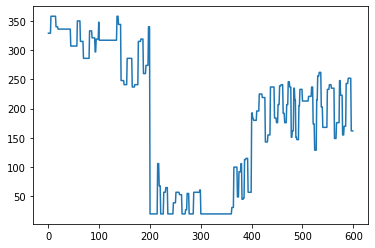

In [ ]:
fig = plt.figure()
plt.plot(df.sensor)
#plt.plot(df.sensor[:200],'y+')
#plt.plot(df.sensor[:400],'ro')
#plt.plot(df.sensor[:600],'gv')

In [ ]:
clf.fit(np.array(emg_data.iloc[:,:-1]),np.array(emg_data.iloc[:,-1]))

SVC()

In [ ]:
clf.predict([np.array([349,	29,	149,	15571])])

array([2])

In [ ]:
test = emg_extract(df,COLUMN_NAME,10)

In [ ]:
test_data = pd.DataFrame({'Max' : test[0] ,'Min' : test[1] ,'Mean' : test[2] ,'Var' : test[3] ,'label' : test[4]})

In [ ]:
test_data

,Max,Min,Mean,Var,label
0,358,286,325.260000,448.436768,0
1,358,286,324.509091,412.986155,0
2,358,286,323.883333,382.624930,0
3,358,286,323.353846,356.354442,0
4,358,286,324.164286,363.548356,0
5,358,241,320.960000,616.750067,0
6,358,241,317.368750,804.473231,0
7,358,237,314.082353,966.218030,0
8,358,237,311.255556,1113.085164,0
9,358,237,310.689474,1097.305180,0


In [ ]:
clf.fit(test_data.iloc[:,:-1],test_data.iloc[:,-1])

SVC()

In [ ]:
clf.predict(emg_data.iloc[:,:-1])

array([0, 0, 1, 1, 2, 2])

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Conv1D, MaxPooling1D,Dropout,Reshape, GlobalAveragePooling1D
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [ ]:
model = Sequential()
model.add(Reshape((4,1),input_shape=(4,)))
model.add(Conv1D(50, 1, activation='relu', input_shape=(4,1)))
model.add(Conv1D(50, 1, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(3, activation='sigmoid'))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 4, 1)              0         
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 50)             100       
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 50)             2550      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 50)            0         
 1D)                                                             
                                                                 
 dense_3 (Dense)             (None, 4, 50)             2550      
                                                                 
 dense_4 (Dense)             (None, 4, 50)             2550      
                                                      

In [ ]:
from keras.utils import to_categorical

In [ ]:
x , x_test = test_data.iloc[:,:-1] , emg_data.iloc[:,:-1]

In [ ]:
y , y_test = to_categorical(test_data.iloc[:,-1]) , to_categorical(emg_data.iloc[:,-1])

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
model.compile(
    loss='categorical_crossentropy',
                optimizer='adam', metrics=['acc'])

# Hyper-parameters
BATCH_SIZE = 10
EPOCHS = 600

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model.fit(x,
                      y,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
              
                      validation_split=0.2,
                      verbose=0
                      )


In [ ]:
accuracy_results = model.evaluate(x_test, y_test)
print("Accuracy :",accuracy_results)

1/1 [==============================] - 0s 39ms/step - loss: 0.1273 - acc: 1.0000
Accuracy : [0.1273307204246521, 1.0]



--- Learning curve of model training ---



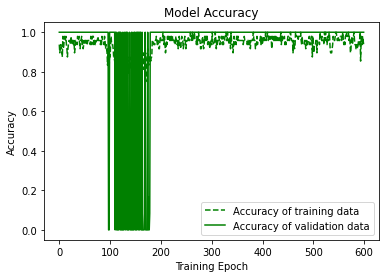

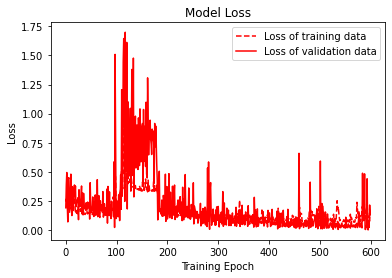


--- Confusion matrix for test data ---

1/1 [==============================] - 0s 229ms/step
[[2 0 0]
 [0 2 0]
 [0 0 2]]

--- Classification report for test data ---



In [ ]:
# %%

print("\n--- Learning curve of model training ---\n")

# summarize history for accuracy and loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], "g--", label="Accuracy of training data")
plt.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.legend()
plt.figure()
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.plot(history.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
#plt.ylim(0)
plt.legend()
plt.show()


In [ ]:

#%%


# y_test = np_utils.to_categorical(y_test, num_classes)

# %%

print("\n--- Confusion matrix for test data ---\n")

y_pred_test = model.predict(x_test)
# # Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

print(confusion_matrix(max_y_test, max_y_pred_test))

# # %%

print("\n--- Classification report for test data ---\n")

# print(classification_report(max_y_test, max_y_pred_test))

#x_test, y_test = create_segments_and_labels(df_test,
#                                            TIME_PERIODS,
#                                            STEP_DISTANCE,
#                                           'LABEL')
#x_test = x_test.reshape(x_test.shape[0], input_shape)
#y_pred = model.predict(x_test)
# if accuracy_results[1]<0.5:
#   y_pred = 1-y_pred
#fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred)
# plt.figure(1)
# plt.plot(fpr_keras, tpr_keras)
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()

In [ ]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 44ms/step


In [ ]:
print(y_pred)

[[0.997534   0.0277612  0.18489444]
 [0.9964871  0.1162762  0.1519986 ]
 [0.9999984  0.99999976 0.9999881 ]
 [0.9997244  1.         0.99999434]
 [0.9999708  0.9999968  0.99999833]
 [0.9999942  0.99913186 0.99999917]]


In [ ]:
for a in range(6):
  print(np.argmax(y_pred[a]))

0
0
1
1
2
2


In [ ]:
|